In [7]:
# In cazul ecuatiilor neliniare, avem:
# f(x*) = 0 cu x* solutia ecuatiei, f: [a, b] -> C, unde df este derivata functiei
# N = nr de iteratii per functie
# TOL = toleranta
# ITMAX = nr maxim de iteratii care se poate realiza
# OPT = criteriu de oprire
# phi(x*) = x*, unde x* s.n. PUNCT FIX
# x0, x1 sunt puncte pe care le alegem noi

# BISECTIE are ca date de intrare: f, a0, b0, ITMAX, TOL, OPT
# PUNCT FIX are ca date de intrare: phi, x0, N
# SECANTA are ca date de intrare: f, x0, x1, N
# POZITIA FALSA are ca date de intrare: f, a, b, N
# N-R are ca date de intrare: f, df, x0, N
# N-R MODIFICATA CU M CUNOSCUT are ca date de intrare: m, f, df, x0, TOL, ITMAX


import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def grafic(f, a, b, nr_figurii):
  figura = plt.figure(nr_figurii)
  figura, ax = plt.subplots()
  ax = plt.axes()
  x_graf = np.linspace(a, b, 100)
  y_graf = f(x_graf)
  ax.grid(True, color = 'k')
  ax.plot(x_graf, y_graf, linestyle = '-', lw = 3, color = 'k', label = 'y = f(x)')
  plt.xlabel('x', color = 'k')
  plt.ylabel('y', color = 'k')
  ax.legend(loc = 'best')
  ax.axhline(y = 0, color = 'k')
  ax.axvline(x = 0, color = 'k')
  return figura, ax

def bisectie(f, a0, b0, ITMAX, TOL, OPT):
  a = [0]
  b = [0]
  a[0] = a0
  b[0] = b0
  x = [a[0]+(b[0]-a[0])/2]
  n = 0
  conditie = 1
  if (OPT == 1):
    conditie = np.abs(b[n]- a[n]) > TOL
  elif (OPT == 3):
    conditie = np.abs(f(x[n]))>TOL
  while conditie and n < ITMAX:
    n = n + 1
    if f(a[n-1])*f(x[n-1]) >= 0:
      a.append(x[n-1])
      b.append(b[n-1])
    else:
      a.append(a[n-1])
      b.append(x[n-1])
    x.append(a[n] + (b[n]-a[n])/2)
    if (OPT == 1):
      conditie = np.abs(b[n]- a[n]) > TOL
    elif (OPT == 2):
      conditie = np.abs(x[n] - x[n-1])/np.abs(x[n-1]) > TOL
    elif (OPT == 3):
      conditie = np.abs(f(x[n])) > TOL
  return x[n], n

def pctfix(phi, x0, N):
  x = np.zeros(N+1)
  x[0] = x0
  for n in range(1, N+1):
    x[n] = phi(x[n-1])
  return x[n]


def NewtonRaphson(f, df, x0, N):
  x = np.zeros(N+1)
  x[0] = x0
  for n in range(1, N+1):
    x[n] = x[n-1] - f(x[n-1])/df(x[n-1])
  return x[n]


def secanta(f, a, b, N):
  x = np.zeros(N+1)
  x[0] = a
  x[1] = b
  n = 1
  err = np.zeros(N)
  err[n-1] = np.abs(x[n-1] - x[n])/np.abs(x[n-1])
  print(f'n = {n} | x{n} = {x[n]} | err = {err[n]}')
  for n in range(2, N):
    x[n] = x[n-1] - f(x[n-1])*(x[n-1] - x[n-2])/(f(x[n-1])-f(x[n-2]))
    err[n-1] = np.abs(x[n-1] - x[n])/np.abs(x[n-1])
    print(f'n = {n} | x{n} = {x[n]} | err = {err[n]}')
  return x[n], err


def pozitiafalsa(f, a, b, N):
  x = np.zeros(N+1)
  x[0] = a
  x[1] = b
  err = np.zeros(N)
  n = 1
  err[n-1] = np.abs(x[n] - x[n-1])/np.abs(x[n-1])
  print(f'n = {n} | x{n} = {x[n]} | err = {err[n]}')
  n = 2
  x[n] = x[n-1] - f(x[n-1])*(x[n-1] - x[n-2])/(f(x[n-1])-f(x[n-2]))
  err[n-1] = np.abs(x[n] - x[n-1])/np.abs(x[n-1])
  print(f'n = {n} | x{n} = {x[n]} | err = {err[n]}')
  for n in range(3, N):
    if f(x[n-1]*f(x[n-2])) < 0:
      x[n] = x[n-1] - f(x[n-1])*(x[n-1] - x[n-2])/(f(x[n-1])-f(x[n-2]))
      err[n-1] = np.abs(x[n] - x[n-1])/np.abs(x[n-1])
    else:
      x[n] = x[n-1] - f(x[n-1])*(x[n-1] - x[n-3])/(f(x[n-1])-f(x[n-3]))
      x[n-2] = x[n-3]
      err[n-1] = np.abs(x[n] - x[n-1])/np.abs(x[n-1])
    print(f'n = {n} | x{n} = {x[n]} | err = {err[n]}')
  return x[n], err

def NewtonRaphsonM(m, f, df, x0, TOL, ITMAX):
  X = sp.Symbol('X')
  F = f(X)
  dF = df(X)
  PHI = sp.simplify(X - (m*F)/dF)
  phi = sp.lambdify(X, PHI, 'numpy')
  x = np.zeros(ITMAX)
  x[0] = x0
  n = 0
  for n in range(1, ITMAX):
    x[n] = phi(x[n-1])
    if np.abs(x[n] - x[n-1]) < TOL:
      return x, n
  return x, n


In [ ]:
#functii laborator:

import numpy as np
import matplotlib.pyplot as plt

# Graficul functiei

def grafic(f, a, b, nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()            # pune la dispozitie sistemul de axe
    x_graf = np.linspace(a, b, 100)
    y_graf = f(x_graf)
    ax.plot(x_graf, y_graf, linestyle='-', lw=3, color='b', label='y=f(x)')
    ax.legend(loc='best')
    ax.grid(True, color='k')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.axhline(y=0, color='k')  # afiseaza axa Ox
    ax.axvline(x=0, color='k')  # afiseaza axa Oy
    return ax

#%% METODA BISECTIEI

def bisectie(f,a0,b0, ITMAX, TOL, OPT = 1):
    a = [a0]
    b = [b0]
    x = [a[0] + (b[0] - a[0])/2]
    n = 0
    conditie = 1
    if (OPT == 1):
        conditie = np.abs(b[n]- a[n]) > TOL
    elif (OPT == 3):
        conditie = np.abs(f(x[n]))>TOL
    while (conditie and n<=ITMAX):
        n = n + 1
        if f(a[n-1]) * f(x[n-1])<=0:
            a.append(a[n-1])     #an = an-1
            b.append(x[n-1])     #bn = xn-1
        else:
            a.append(x[n-1])     #an = xn-1
            b.append(b[n-1])     #bn = bn-1
        x.append(a[n] + (b[n] - a[n])/2 )
        if (OPT == 1):
            conditie = np.abs(b[n]- a[n]) > TOL
        elif (OPT == 2):
            conditie = np.abs(x[n] - x[n-1])/np.abs(x[n-1]) > TOL
        elif (OPT == 3):
            conditie = np.abs(f(x[n]))>TOL
    return x[n],n

#%%2. METODA PUNCTULUI FIX

def MetPunctFix(phi, x0, N):
    x = np.zeros(N + 1)  # are elemente de la x0 pana la xn
    x[0] = x0
    for n in range(1, N + 1):
        x[n] = phi(x[n - 1])
    return x[n]

#%%3. METODA NewtonRaphson

def NewtonRaphson(f, df, x0, N):
    x = np.zeros(N + 1)
    x[0] = x0
    for n in range(N + 1):
        x[n] = x[n - 1] - f(x[n - 1]) / df(x[n - 1])
    return x

#%%4. METODA NewtonRaphson MODIFICATA (1), UNDE SE CUNOASTE M

def NewtonRaphsonmodificata1(m,f,df,x0,ITMAX,TOL):
    X=sp.Symbol("X")
    F=f(X) #F este o expresie simbolica construita in baza functiei f
    dF=df(X)
    PHI=sp.simplify(X-(m*F)/dF)
    phi=sp.lambdify(X,PHI,"numpy")
    x=np.zeros(ITMAX)
    x[0]=x0
    n=0
    for n in range(1,ITMAX):
        x[n]=phi(x[n-1])
        if np.abs(x[n]-x[n-1])<TOL:
            return x,n
    return x,n

#%%5. METODA POZITIEI FALSE

def Pozitiefalsaf(f, a, b, N):
    x = np.zeros(N+1)
    n = 1
    x[n-1] = a
    x[n] = b
    err = np.zeros(N)
    err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
    print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    n=2
    x[n] = x[n-1] - f(x[n-1])*(x[n-1]-x[n-2])/(f(x[n-1])-f(x[n-2]))
    err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
    print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    for n in range(3, N+1):
        if f(x[n-1])*f(x[n-2])<=0:
            x[n] = x[n-1] - f(x[n-1])*(x[n-1]-x[n-2])/(f(x[n-1])-f(x[n-2]))
            err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
        else:
            x[n] = x[n-1] - f(x[n-1])*(x[n-1]-x[n-3])/(f(x[n-1])-f(x[n-3]))
            x[n-2]=x[n-3]
            err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
        print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )

    return x[n], err

#%%6. METODA SECANTEI

def Secantaf(f, x0, x1, N):
    x = np.zeros(N+1)
    x[0] = x0
    x[1] = x1
    n = 1
    err = np.zeros(N)
    err[0] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
    print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    for n in range(2, N+1):
        x[n] = x[n-1] - f(x[n-1])*(x[n-1]-x[n-2])/(f(x[n-1])-f(x[n-2]))
        err[n-1] = np.abs(x[n-1]-x[n])/np.abs(x[n-1])
        print(f"n = {n}| x{n} = {x[n]}| err = {err[n-1]}" )
    return x[n], err

In [ ]:
# Definește funcția și derivata
f = lambda x: x**2 - 2*x + 1
df = lambda x: 2*x - 2
phi = lambda x: x**2 - 2*x + 2


# Bisection
x_sol1, nr_it1 = bisectie(f, -2, 2, ITMAX=10**4, TOL=10**(-8), OPT=1)
print('METODA BISECTIEI: ', x_sol1, '\n', nr_it1)
figura1, ax1 = grafic(f, -2, 2, 1)
ax1.plot(x_sol1, f(x_sol1), linestyle='None', marker='o', markersize=10, color='g', label = 'METODA BISECTIEI')

# Punctul Fix
x_sol2 = pctfix(phi, 0, 10)
print('METODA PUNCTULUI FIX', x_sol2)
figura2, ax2 = grafic(f, -2, 2, 2)
ax2.plot(x_sol2, f(x_sol2), linestyle='None', marker='o', markersize=10, color='g', label = 'METODA PUNCTULUI FIX')

# Secanta
x_sol3, err3 = secanta(f, -2, 2, N=10)
print('METODA SECANTEI', x_sol3, '\n', err3)
figura3, ax3 = grafic(f, -2, 2, 3)
ax3.plot(x_sol3, f(x_sol3), linestyle='None', marker='o', markersize=10, color='g', label = 'METODA SECANTEI')

# Pozitia Falsa
x_sol4, err4 = pozitiafalsa(f, -2, 2, 10)
print('METODA POZITIEI FALSE: ', '\n', 'solutia este: ', x_sol4)
figura5, ax5 = grafic(f, -2, 2, 5)
ax5.plot(x_sol4, f(x_sol4), linestyle='None', marker='o', markersize=10, color='g', label = 'METODA POZITIEI FALSE')

# Newton-Raphson
x_sol6 = NewtonRaphson(f, df, 0, 10)
print('METODA NewtonRaphson:', '\n', 'solutia este: ', x_sol6)
figura6, ax6 = grafic(f, -2, 2, 6)
ax6.plot(x_sol6, f(x_sol6), linestyle='None', marker='o', markersize=10, color='g', label = 'METODA NewtonRaphson')

# Newton-Raphson cu m cunoscut
x_sol7, nr_it7 = NewtonRaphsonM(2, f, df, 0.01, 10**(-8), 20)
print('METODA NewtonRaphson MODIFICATA, UNDE SE CUNOASTE M:', '\n', 'x_sol: ', x_sol7, 'iar nr de iteratii: ', nr_it7)
figura7, ax7 = grafic(f, -2, 2, 7)
ax7.plot(x_sol7, f(x_sol7), linestyle='None', marker='o', markersize=10, color='g', label = 'METODA NewtonRaphson MODIFICATA')

plt.show()


In [ ]:
#test analiza 2022

#%% EX 1

import numpy as np
import matplotlib.pyplot as plt

def grafic(f, a, b, nr_fig):
    fig = plt.figure(nr_fig)
    ax = plt.axes()
    x_graf = np.linspace(a, b, 100)
    y_graf = f(x_graf)
    ax.plot(x_graf, y_graf, linestyle = '-', lw = 3, color = 'k', label = 'y = f(x)')
    ax.grid(True, color = 'k')
    plt.xlabel('x', color = 'k')
    plt.ylabel('y', color = 'k')
    ax.legend(loc = 'best')
    ax.axvline(x = 0, color = 'k')
    ax.axhline(y = 0, color = 'k')
    return ax

def NR(f, df, a, b, x0, ITMAX, TOL):
    n = 0
    x = np.zeros(ITMAX+1)
    x[0] = x0
    while n <= ITMAX:
        n = n + 1
        x[n] = x[n-1] - f(x[n-1]) / df(x[n-1])
        err_a = np.abs(x[n] - x[n-1])
        err_r = np.abs(f(x[n]))
        print(f"Iteratia {n:4d}: x = {x[n]:.10f} | "
              f"err_a = {err_a:.4e} |  "
              f"err_z = {err_r:.4e}")
        if err_a < TOL:
            return x[n], n
    print("Numarul maxim de iteratii a fost atins.")
    SOL = x[n]
    return SOL, n

# EX 2
f = lambda x: x**3 - 2*x**2 - 5
df = lambda x: 3*x**2 - 4*x
a, b = 1, 4
x0 = 4
ITMAX = 10
TOL = 10**(-10)

SOL, IT = NR(f, df, 1, 4, 4, 10, 10**(-10))
print('Solutia ecuatiei este: ', SOL, '\n')
print('Numarul de iteratii executate este: ', IT, '\n')

ax1 = grafic(f, 1, 4, 1)
ax1.plot(SOL, f(SOL), linestyle = 'None', marker = 'o', markersize = 5, color = 'r')

#viteza de convergenta NR este patratica r = 2
#O alta metoda : SECANTEI, cu viteza mai mica

Solutia este:  [ 0.         -0.5        -0.75       -0.875      -0.9375     -0.96875
 -0.984375   -0.9921875  -0.99609375 -0.99804688] 

Nr de iteratii: 9 



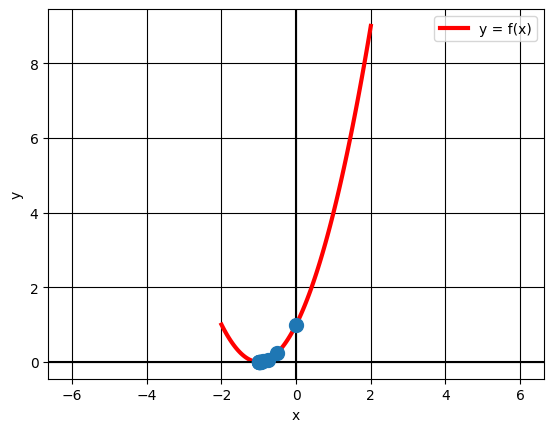

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

def grafic(f, a, b, nr_fig):
  figura = plt.figure(nr_fig)
  ax = plt.axes()
  x_graf = np.linspace(a, b, 100)
  y_graf = f(x_graf)
  ax.plot(x_graf, y_graf, linestyle = '-', lw = 3, color = 'r', label = 'y = f(x)')
  ax.grid(True, color = 'k')
  ax.legend(loc = 'best')
  plt.xlabel('x', color = 'k')
  plt.ylabel('y', color = 'k')
  ax.axvline(x = 0, color = 'k')
  ax.axhline(y = 0, color = 'k')
  plt.axis('equal')
  return ax
'''
def pozitiafalsa(f, a, b, N):
  x = np.zeros(N+1)
  n = 1
  x[0] = a
  x[1] = b
  err = np.zeros(N)
  err[n-1] = np.abs(x[n-1]- x[n])/np.abs(x[n-1])
  print(f'n = {n:4d} | x{n:4d} = {x[n]:.10f} | err = {err[n-1]:.10e}')
  n = 2
  x[n] = x[n-1] - f(x[n-1]) * (x[n-1] - x[n-2]) / (f(x[n-1]) - f(x[n-2]))
  err[n-1] = np.abs(x[n-1]- x[n])/np.abs(x[n-1])
  print(f'n = {n:4d} | x{n:4d} = {x[n]:.10f} | err = {err[n-1]:.10e}')
  for n in range(3, N+1):
    if f(x[n-1])*f(x[n-2]) < 0:
      x[n] = x[n-1] - f(x[n-1]) * (x[n-1] - x[n-2]) / (f(x[n-1]) - f(x[n-2]))
      err[n-1] = np.abs(x[n-1]- x[n])/np.abs(x[n-1])
      print(f'n = {n:4d} | x{n:4d} = {x[n]:.10f} | err = {err[n-1]:.10e}')
    else:
      x[n] = x[n-1] - f(x[n-1]) * (x[n-1] - x[n-3]) / (f(x[n-1]) - f(x[n-3]))
      x[n-2] = x[n-3]
      err[n-1] = np.abs(x[n-1]- x[n])/np.abs(x[n-1])
      print(f'n = {n:4d} | x{n:4d} = {x[n]:.10f} | err = {err[n-1]:.10e}')
  return x[n], err

f = lambda x: x + 1
a, b = -2, 2
N = 10
SOL, ERR = pozitiafalsa(f, a, b, N)
print('Solutia este: ', SOL, '\n')
ax1 = grafic(f, a, b, 1)
plt.axis('equal')
ax1.plot(SOL, f(SOL), linestyle = 'None', marker = 'o', markersize = 10, label = 'metoda pozitiei false')
'''
def NRM(m, f, df, x0, TOL, N):
  X = sp.Symbol('X')
  F = f(X)
  dF = df(X)
  PHI = sp.simplify(X - (m*F) / dF)
  phi = sp.lambdify('X', PHI, 'numpy')
  n = 0
  x = np.zeros(N)
  x[0] = x0
  for n in range(1, N):
    x[n] = phi(x[n-1])
    if np.abs(x[n] - x[n-1]) < TOL:
      return x, n
  return x, n

f = lambda x: x**2 + 2*x + 1
df = lambda x: 2*x + 2
SOL, IT = NRM(1, f, df, 0, 10**(-10), 10)
print('Solutia este: ', SOL, '\n')
print('Nr de iteratii:', IT, '\n')
ax2 = grafic(f, a, b, 2)
plt.axis('equal')
ax2.plot(SOL, f(SOL), linestyle = 'None', marker = 'o', markersize = 10, label = 'metoda N-R modificata')
